In [ ]:
#PROJET analyse de Données: US 2020 Elections

SyntaxError: invalid syntax (1610990778.py, line 1)

In [79]:
import pandas as pd
import numpy as np
import prince

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [80]:
US_data = pd.read_csv("./data.csv")

US_data = US_data.drop(US_data.columns[0], axis=1)

US_data.head()

,County,State,Democrat vote raw,Democrat vote %,Republican vote raw,Republican vote %,Other vote raw,Other vote %,Less than 9th grade,9th to 12th grade,...,NH-Natives %,NH-Asian %,NH-Native Pacific Islander %,NH- Other Race %,NH-Two or More Races %,"% in Management, business, science, and arts",% in Service,% in Sales and Office,% in Resources and Construction,% in Transportation
0,Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,7.90%,...,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,6.40%,...,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,16.20%,...,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,14.70%,...,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,11.10%,...,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73


In [81]:
dem = np.array(US_data["Democrat vote raw"])
rep = np.array(US_data["Republican vote raw"])

result = np.where(dem > rep, 'Democrat', 'Republican')

# Using 'Address' as the column name
# and equating it to the list
US_data['Parti'] = result

US_data.head()

,County,State,Democrat vote raw,Democrat vote %,Republican vote raw,Republican vote %,Other vote raw,Other vote %,Less than 9th grade,9th to 12th grade,...,NH-Asian %,NH-Native Pacific Islander %,NH- Other Race %,NH-Two or More Races %,"% in Management, business, science, and arts",% in Service,% in Sales and Office,% in Resources and Construction,% in Transportation,Parti
0,Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,7.90%,...,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36,Republican
1,Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,6.40%,...,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13,Republican
2,Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,16.20%,...,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09,Republican
3,Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,14.70%,...,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47,Republican
4,Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,11.10%,...,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73,Republican


In [82]:
colonnes_pourcentages = ['Less than 9th grade', '9th to 12th grade','HS graduate and eq','College,No Degree','Associates Degree','Bachelors Degree','Graduate or professional degree']

# Appliquer la conversion aux colonnes spécifiées
US_data[colonnes_pourcentages] = US_data[colonnes_pourcentages].replace('%', '', regex=True)  # Supprimer le signe '%'
US_data[colonnes_pourcentages] = US_data[colonnes_pourcentages].apply(pd.to_numeric)/100  # Convertir en numérique et diviser par 100

US_data.head()

,County,State,Democrat vote raw,Democrat vote %,Republican vote raw,Republican vote %,Other vote raw,Other vote %,Less than 9th grade,9th to 12th grade,...,NH-Asian %,NH-Native Pacific Islander %,NH- Other Race %,NH-Two or More Races %,"% in Management, business, science, and arts",% in Service,% in Sales and Office,% in Resources and Construction,% in Transportation,Parti
0,Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,0.017,0.079,...,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36,Republican
1,Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,0.020,0.064,...,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13,Republican
2,Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,0.073,0.162,...,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09,Republican
3,Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,0.064,0.147,...,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47,Republican
4,Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,0.071,0.111,...,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73,Republican


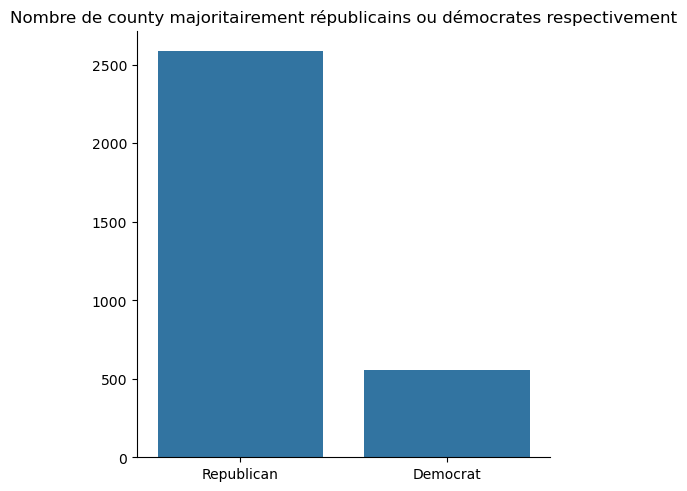

In [83]:
fig = sns.catplot(data=US_data, x='Parti', kind='count')
#fig.set_xticklabels(["Men", "Women", "Children"])

plt.xlabel('')
plt.ylabel('')
plt.title('Nombre de county majoritairement républicains ou démocrates respectivement')
plt.show()

# --- #
print('')

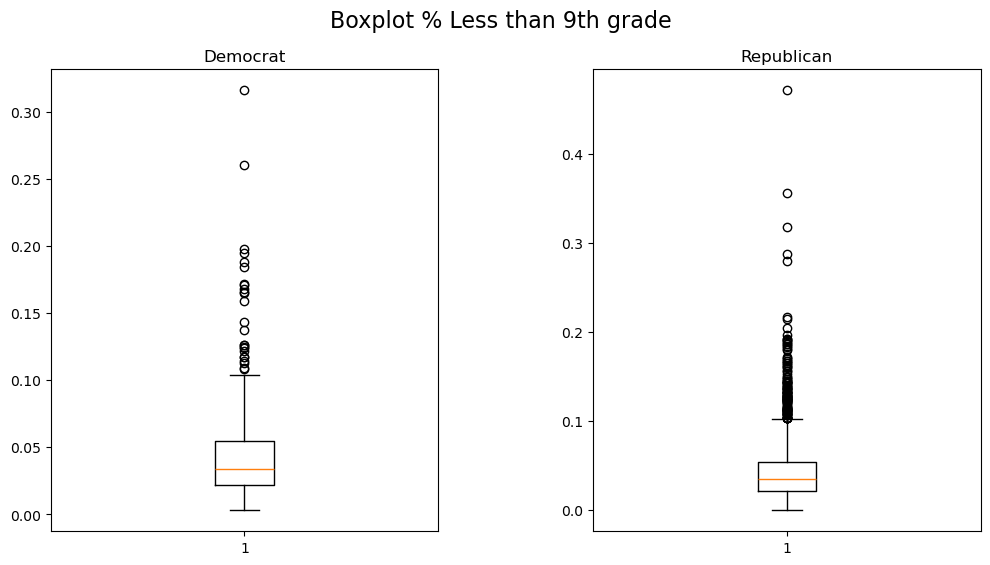

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % Less than 9th grade', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'Less than 9th grade'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'Less than 9th grade'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

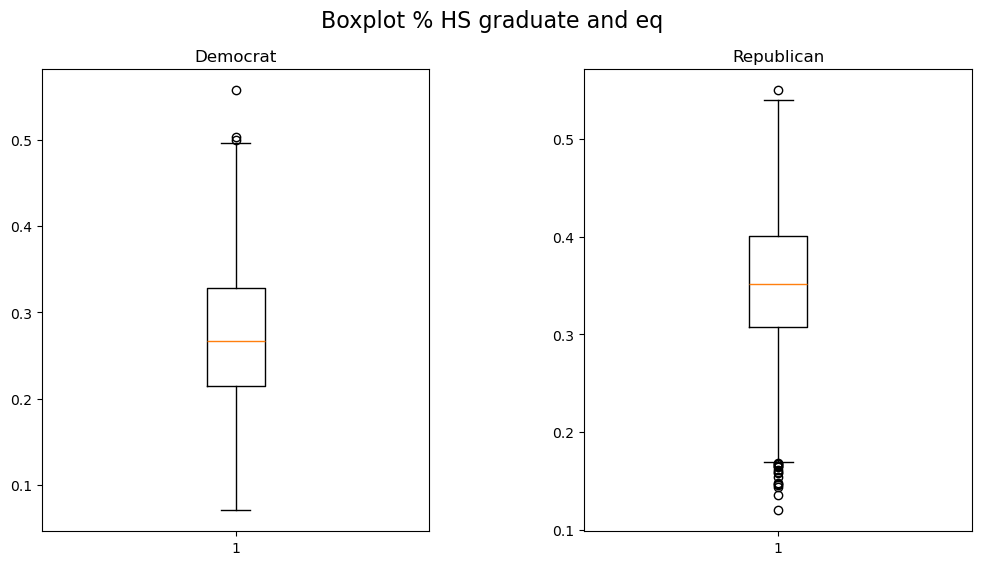

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % HS graduate and eq', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'HS graduate and eq'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'HS graduate and eq'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

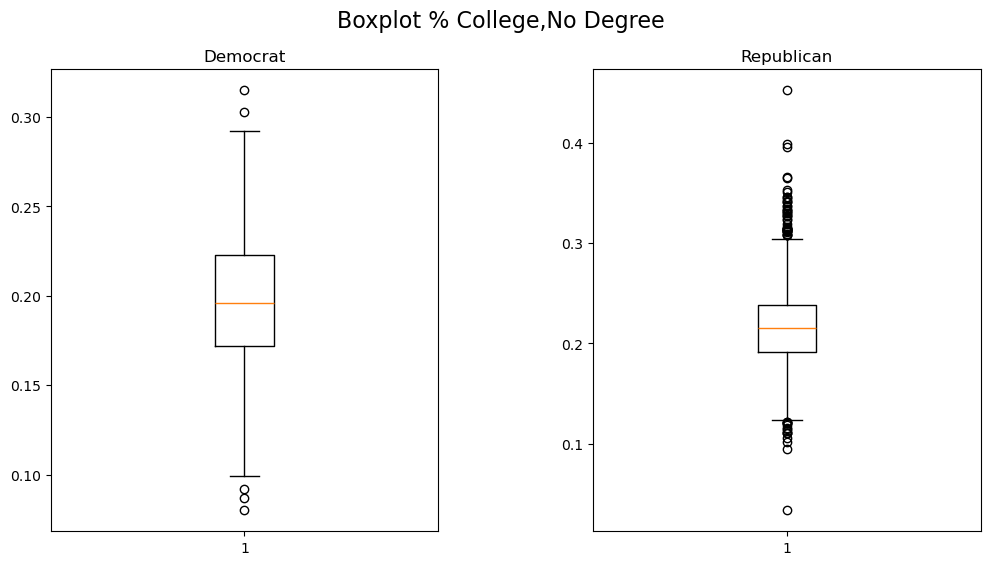

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % College,No Degree', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'College,No Degree'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'College,No Degree'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

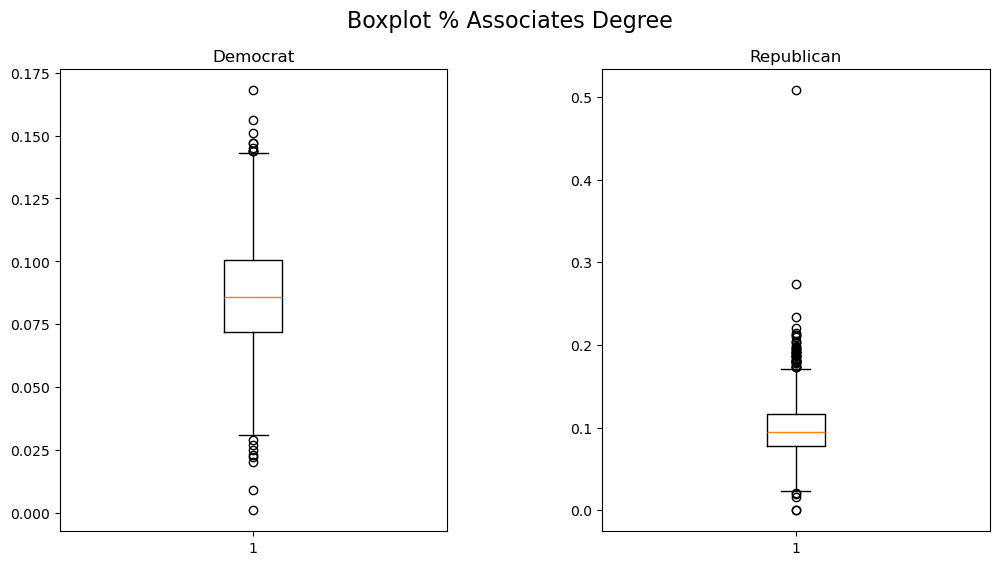

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % Associates Degree', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'Associates Degree'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'Associates Degree'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

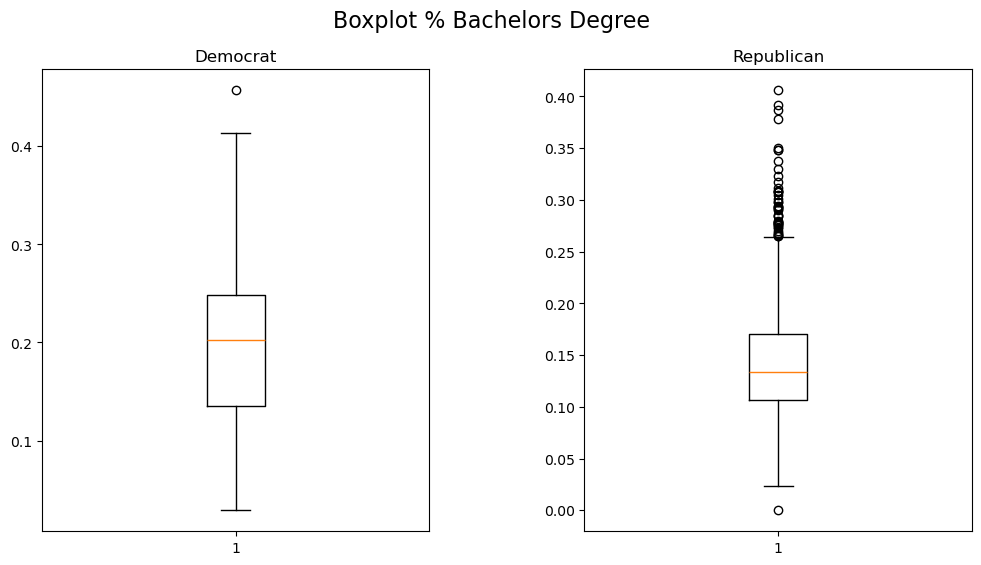

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % Bachelors Degree', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'Bachelors Degree'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'Bachelors Degree'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

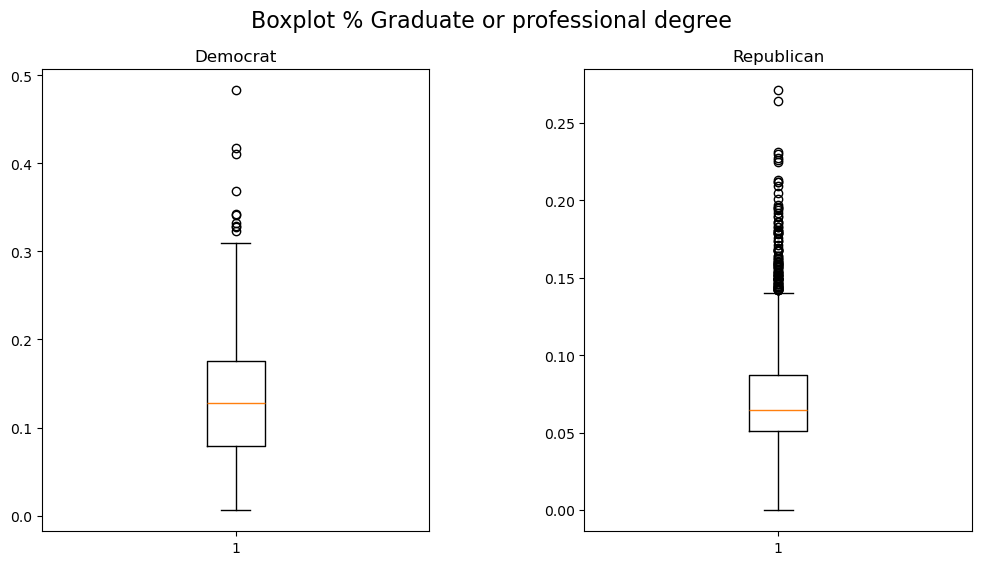

<Figure size 640x480 with 0 Axes>

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Boxplot % Graduate or professional degree', fontsize=16)

axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'Graduate or professional degree'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'Graduate or professional degree'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()
axs[0].boxplot(US_data.loc[US_data['Parti'] == 'Democrat', 'HS graduate and eq'])
axs[0].set_title('Democrat')

axs[1].boxplot(US_data.loc[US_data['Parti'] == 'Republican', 'HS graduate and eq'])
axs[1].set_title('Republican')

plt.subplots_adjust(wspace=0.4)

plt.show()

In [93]:
US_dataACP = US_data.drop(['County', 'State','Parti'], axis=1)

US_dataACP['Median income'] = US_dataACP['Median income'].str.replace(',', '.').astype(float)
US_dataACP['Mean income'] = US_dataACP['Mean income'].str.replace(',', '.').astype(float)


US_dataACP.head()


ValueError: could not convert string to float: '1.00.662'

In [92]:
scaler = StandardScaler()
US_data_scaled = scaler.fit_transform(US_dataACP)

# 2. Application de l'ACP
pca = PCA()
pca.fit(US_data_scaled)

ValueError: could not convert string to float: '68,315'